<a href="https://colab.research.google.com/github/Clint07-datascientist/AgroInsightX_ML_Project/blob/main/Summative_Intro_to_ml_Clinton_Pikita_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [1]:
import sys
print(sys.executable)

c:\Users\ELOHOME\AgroInsightX_ML\AgroInsightX_ML_Project\.venv_maize\Scripts\python.exe


In [3]:
#Import Necessary Libraries
import os
import joblib
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image # For classical ML image loading
import matplotlib.pyplot as plt # For visualization
from sklearn.preprocessing import StandardScaler # For classical ML data scaling

In [4]:
def remove_corrupt_images(data_dir):
    num_removed = 0
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for fname in os.listdir(class_path):
                if fname.lower().endswith('.jpg'):
                    fpath = os.path.join(class_path, fname)
                    try:
                        with Image.open(fpath) as img:
                            img.verify()  # Will not load the image, but will check for corruption
                    except Exception as e:
                        print(f"Removing corrupt image: {fpath}")
                        os.remove(fpath)
                        num_removed += 1
    print(f"Removed {num_removed} corrupt images from {data_dir}")

# Run for both train and validation directories
remove_corrupt_images('data/train_data')
remove_corrupt_images('data/validation_data')

Removed 0 corrupt images from data/train_data
Removed 0 corrupt images from data/validation_data


In [5]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

# Defined the paths to the training and validation sets
train_set = 'data/train_data'
validation_set = 'data/validation_data'

# Load the training dataset from the 'train' folder
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_set,
    label_mode='categorical',
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

# Load the validation dataset from the 'val' folder
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_set,
    label_mode='categorical',
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

def get_cnn_data(dataset):
    """
    Extracts features and labels from a tf.data.Dataset for a CNN, 
    keeping the image shape and normalizing.
    """
    features = []
    labels = []
    
    # Iterate through the dataset
    for image_batch, label_batch in dataset:
        features.append(image_batch.numpy())
        labels.append(label_batch.numpy())
        
    # Concatenate all batches and normalize
    features = np.concatenate(features) / 255.0  # Normalize here
    labels = np.concatenate(labels)
    
    return features, labels

# Create the variables your model needs
X_train, y_train = get_cnn_data(train_dataset)
X_val, y_val = get_cnn_data(validation_dataset)


Found 347 files belonging to 7 classes.
Found 348 files belonging to 7 classes.


Found 7 classes.
Class Names: ['Fall_Armyworm', 'Grasshoper', 'Healthy_Maize', 'Leaf_Beetle', 'Leaf_Blight', 'Leaf_Spot', 'Streak_Virus']


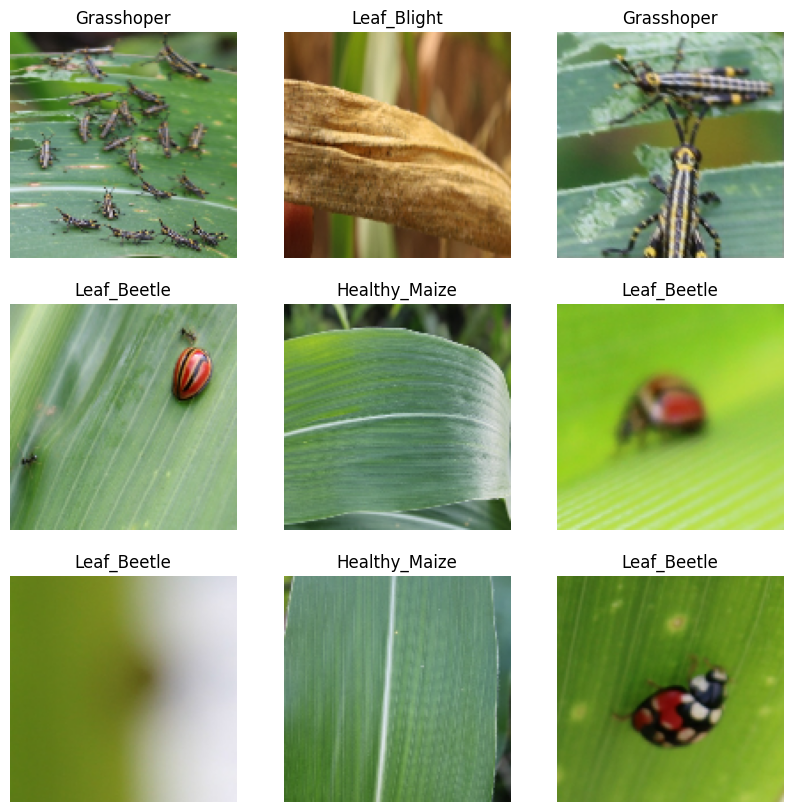

In [6]:
# Verify the data by plotting images
class_names = train_dataset.class_names
print(f"Found {len(class_names)} classes.")
print("Class Names:", class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[tf.argmax(labels[i])])
    plt.axis("off")
plt.show()

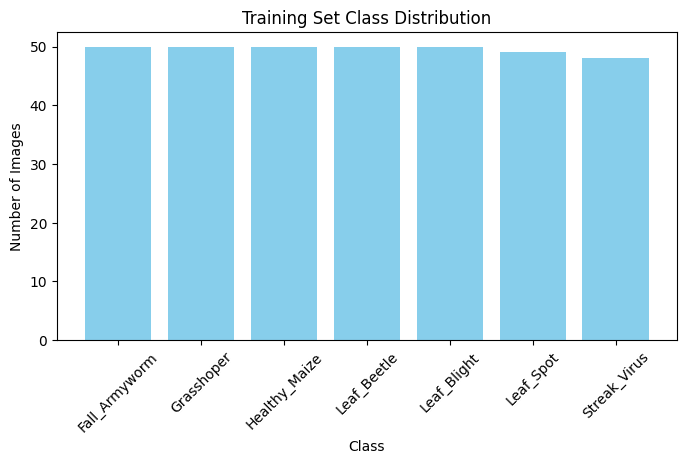

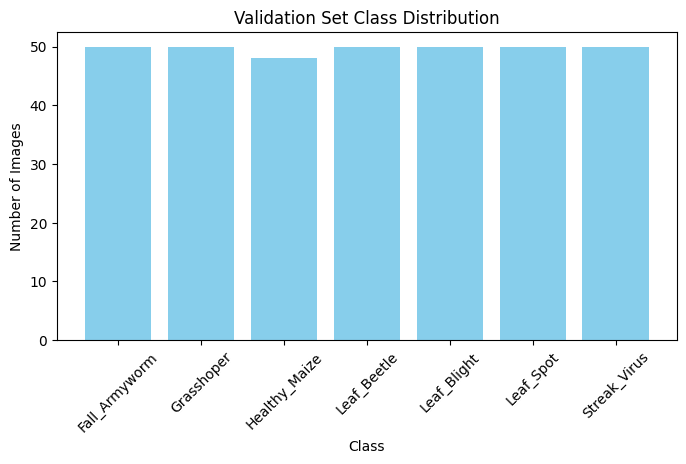

In [7]:
import matplotlib.pyplot as plt

# Paths to your data folders
train_dir = 'data/train_data'
val_dir = 'data/validation_data'

def plot_class_distribution(data_dir, title):
    class_counts = {}
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            count = len([f for f in os.listdir(class_path) if f.endswith('.jpg')])
            class_counts[class_name] = count
    # Plot
    plt.figure(figsize=(8,4))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.show()

# Plot for train and validation sets
plot_class_distribution(train_dir, "Training Set Class Distribution")
plot_class_distribution(val_dir, "Validation Set Class Distribution")

In [8]:
def check_and_remove_corrupt_images(data_dir, num_samples=100):
    shapes = []
    corrupt_files = []
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            files = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
            for f in files[:num_samples]:  # Limit to first 100 images per class for speed
                img_path = os.path.join(class_path, f)
                try:
                    with Image.open(img_path) as img:
                        shapes.append(np.array(img).shape)
                except Exception as e:
                    corrupt_files.append(img_path)
                    print(f"Removing corrupt image: {img_path}")
                    os.remove(img_path)  # This deletes the corrupt file!
    unique_shapes = set(shapes)
    print(f"Unique image shapes in {data_dir}: {unique_shapes}")
    if corrupt_files:
        print(f"Removed {len(corrupt_files)} corrupt images.")

# Run for train and validation sets
check_and_remove_corrupt_images(train_dir)
check_and_remove_corrupt_images(val_dir)

Unique image shapes in data/train_data: {(400, 400, 3)}
Unique image shapes in data/validation_data: {(400, 400, 3)}


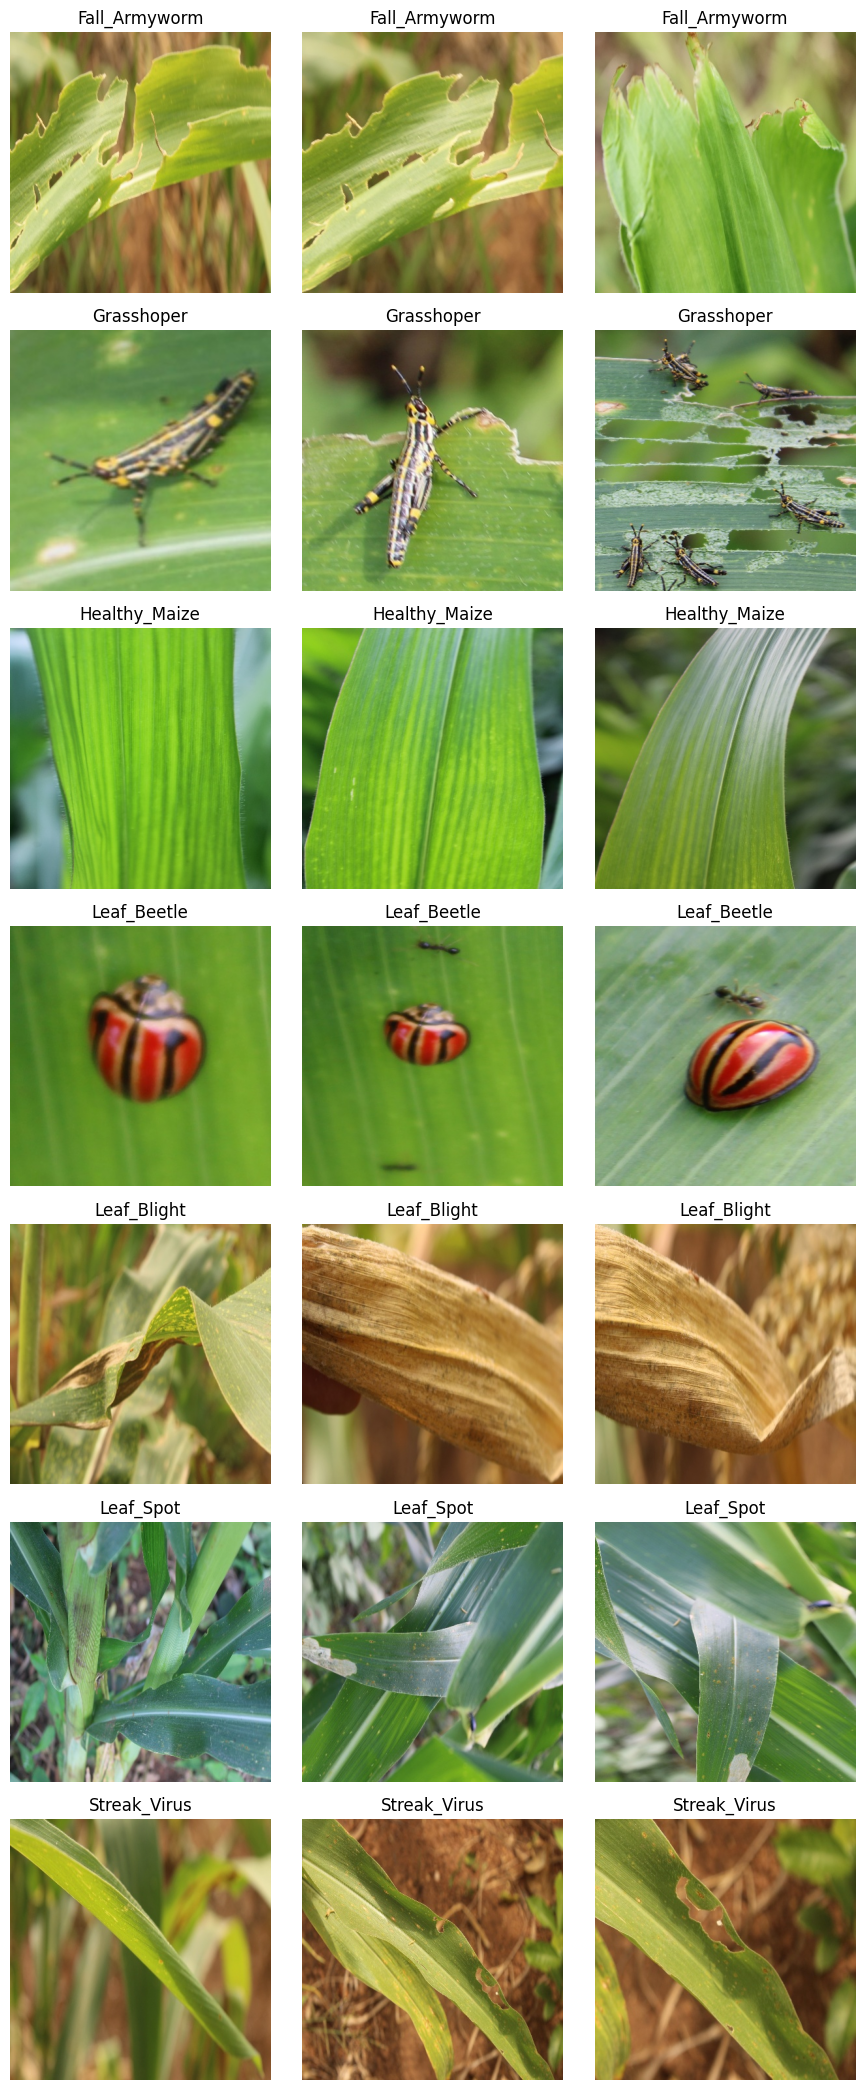

In [9]:
def plot_sample_images(data_dir, num_samples=3):
    class_names = os.listdir(data_dir)
    plt.figure(figsize=(num_samples*3, len(class_names)*3))
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            files = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
            for j in range(num_samples):
                img_path = os.path.join(class_path, files[j])
                img = Image.open(img_path)
                plt.subplot(len(class_names), num_samples, i*num_samples + j + 1)
                plt.imshow(img)
                plt.title(class_name)
                plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_sample_images(train_dir, num_samples=3)

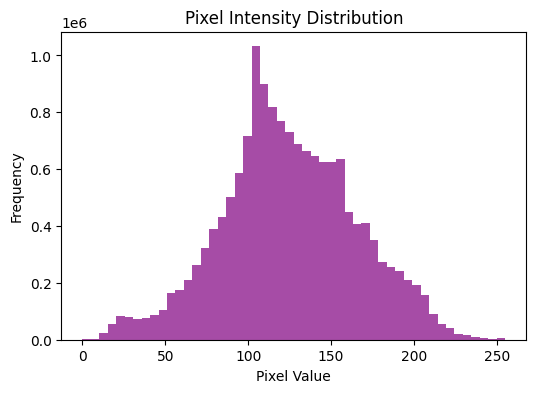

In [10]:
def plot_pixel_distribution(data_dir, num_images=100):
    pixel_values = []
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            files = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
            for f in files[:num_images//len(os.listdir(data_dir))]:
                img_path = os.path.join(class_path, f)
                img = Image.open(img_path).convert('L')  # Convert to grayscale for simplicity
                pixel_values.extend(np.array(img).flatten())
    plt.figure(figsize=(6,4))
    plt.hist(pixel_values, bins=50, color='purple', alpha=0.7)
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

plot_pixel_distribution(train_dir)

In [11]:
def check_corrupt_images(data_dir):
    corrupt_files = []
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            files = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
            for f in files:
                img_path = os.path.join(class_path, f)
                try:
                    img = Image.open(img_path)
                    img.verify()  # Will not load the image, but will check for corruption
                except Exception as e:
                    corrupt_files.append(img_path)
    print(f"Found {len(corrupt_files)} corrupt images.")
    if corrupt_files:
        print("Corrupt files:", corrupt_files)

check_corrupt_images(train_dir)

Found 0 corrupt images.


In [12]:
def split_dataset(dataset, split_ratio=0.5):
    """
    Splits a tf.data.Dataset into two smaller datasets.
    
    Args:
      dataset (tf.data.Dataset): The dataset to be split.
      split_ratio (float): The ratio for the first split (e.g., 0.5 for a 50/50 split).
      
    Returns:
      A tuple containing the two new datasets.
    """
    # Get the dataset size and convert it to a regular number with .numpy()
    dataset_size = tf.data.experimental.cardinality(dataset).numpy()

    # Calculate the number of elements for the first split
    split_count = int(dataset_size * split_ratio)
    
    split_1 = dataset.take(split_count)
    split_2 = dataset.skip(split_count)
    
    return split_1, split_2

In [13]:
test_dataset, validation_dataset = split_dataset(validation_dataset, split_ratio=0.5)

print('Number of batches in the new validation set: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of batches in the new test set: %d' % tf.data.experimental.cardinality(test_dataset))

Number of batches in the new validation set: 6
Number of batches in the new test set: 5


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques


In [13]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad
from tensorflow.keras.callbacks import EarlyStopping

def define_model(optimizer_name='adam', regularization=None, early_stopping=False, dropout=0.0, learning_rate=0.001, input_shape=(128,128,3), num_classes=7):
    # Regularization
    reg = None
    if regularization == 'l1':
        reg = regularizers.l1(0.01)
    elif regularization == 'l2':
        reg = regularizers.l2(0.01)
    elif regularization == 'l1_l2':
        reg = regularizers.l1_l2(l1=0.01, l2=0.01)
    
    # Model architecture
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=reg))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=reg))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    if dropout > 0:
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=reg))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    # Optimizer
    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'adagrad':
        optimizer = Adagrad(learning_rate=learning_rate)
    else:
        optimizer = Adam(learning_rate=learning_rate)  # default
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Callbacks
    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True))
    
    return model, callbacks

In [14]:
# Baseline (no special optimizer, regularization, or early stopping)
model1, cb1 = define_model(optimizer_name='adam', regularization=None, early_stopping=False, dropout=0.0, learning_rate=0.001)

# With different optimizers
model2, cb2 = define_model(optimizer_name='adam', regularization='l2', early_stopping=True, dropout=0.3, learning_rate=0.001)
model3, cb3 = define_model(optimizer_name='rmsprop', regularization='l1', early_stopping=True, dropout=0.3, learning_rate=0.001)
model4, cb4 = define_model(optimizer_name='sgd', regularization='l1_l2', early_stopping=True, dropout=0.3, learning_rate=0.001)
model5, cb5 = define_model(optimizer_name='adagrad', regularization=None, early_stopping=True, dropout=0.3, learning_rate=0.001)

c:\Users\ELOHOME\AgroInsightX_ML\AgroInsightX_ML_Project\.venv_maize\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/32


11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 501ms/step - accuracy: 0.1285 - loss: 354.7474 - val_accuracy: 0.1753 - val_loss: 5.4367
Epoch 2/32
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 518ms/step - accuracy: 0.3878 - loss: 2.4666 - val_accuracy: 0.2816 - val_loss: 1.9436
Epoch 3/32
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 472ms/step - accuracy: 0.7910 - loss: 0.8743 - val_accuracy: 0.3276 - val_loss: 2.2096
Epoch 4/32
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 490ms/step - accuracy: 0.9301 - loss: 0.2688 - val_accuracy: 0.3477 - val_loss: 2.4892
Epoch 5/32
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 522ms/step - accuracy: 0.9853 - loss: 0.1190 - val_accuracy: 0.3333 - val_loss: 2.6816
Epoch 6/32
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 484ms/step - accuracy: 0.9895 - loss: 0.0534 - val_accuracy: 0.2816 - val_loss: 3.2781
Epoch 7/32
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 474ms/step - accuracy: 0.9963 - loss: 0.0272 - val_accuracy: 0.3707 - val_loss: 4.4359
Epoch 8/32
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 461ms/step - accuracy: 0.9863 - loss: 0.0529 - val_accuracy: 0.2931 -

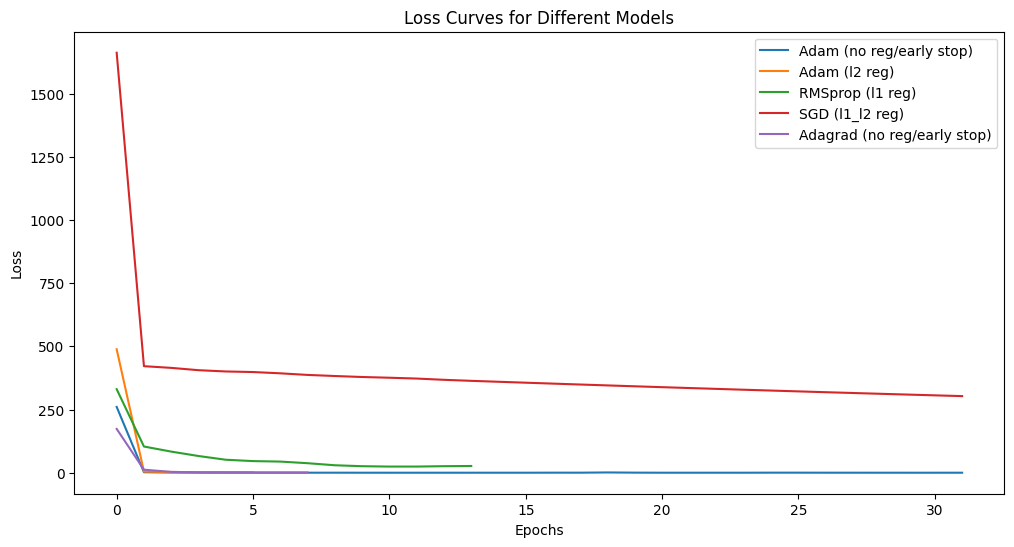

In [15]:
history1 = model1.fit(train_dataset, validation_data=validation_dataset, epochs=32, callbacks=cb1)
history2 = model2.fit(train_dataset, validation_data=validation_dataset, epochs=32, callbacks=cb2)
history3 = model3.fit(train_dataset, validation_data=validation_dataset, epochs=32, callbacks=cb3)
history4 = model4.fit(train_dataset, validation_data=validation_dataset, epochs=32, callbacks=cb4)
history5 = model5.fit(train_dataset, validation_data=validation_dataset, epochs=32, callbacks=cb5)

# Plot loss curves
plt.figure(figsize=(12, 6))
plt.plot(history1.history['loss'], label='Adam (no reg/early stop)')
plt.plot(history2.history['loss'], label='Adam (l2 reg)')
plt.plot(history3.history['loss'], label='RMSprop (l1 reg)')
plt.plot(history4.history['loss'], label='SGD (l1_l2 reg)')
plt.plot(history5.history['loss'], label='Adagrad (no reg/early stop)')
plt.title('Loss Curves for Different Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [16]:
def extract_features(dataset):
    """
    Extracts features and labels from a tf.data.Dataset and returns them as NumPy arrays.
    
    Args:
      dataset (tf.data.Dataset): The dataset to extract features from.
      
    Returns:
      A tuple of (features, labels) as NumPy arrays.
    """
    features = []
    labels = []
    
    # Iterate through the dataset
    for image_batch, label_batch in dataset:
        # Convert images to grayscale
        gray_images = tf.image.rgb_to_grayscale(image_batch)
        # Flatten the images
        batch_features = tf.reshape(gray_images, [gray_images.shape[0], -1])
        
        features.append(batch_features.numpy())
        labels.append(label_batch.numpy())
        
    # Concatenate all batches
    features = np.concatenate(features)
    labels = np.concatenate(labels)
    
    return features, labels

In [17]:
import time
# Extract features for training and validation sets
print("Extracting features from the training set...")
start_time = time.time()
X_train_svm, y_train_svm = extract_features(train_dataset)
print(f"...done in {time.time() - start_time:.2f} seconds.")

print("\nExtracting features from the validation set...")
start_time = time.time()
X_val_svm, y_val_svm = extract_features(validation_dataset)
print(f"...done in {time.time() - start_time:.2f} seconds.")


# Scaling is crucial for SVM performance
print("\nScaling features...")
scaler = StandardScaler()
X_train_svm = scaler.fit_transform(X_train_svm)
X_val_svm = scaler.transform(X_val_svm)
print("...done.")


# Verify the shapes
print(f"\nShape of X_train for SVM: {X_train_svm.shape}")
print(f"Shape of y_train for SVM: {y_train_svm.shape}")
print(f"Shape of X_val for SVM: {X_val_svm.shape}")
print(f"Shape of y_val for SVM: {y_val_svm.shape}")

Extracting features from the training set...
...done in 0.63 seconds.

Extracting features from the validation set...
...done in 0.55 seconds.

Scaling features...
...done.

Shape of X_train for SVM: (347, 16384)
Shape of y_train for SVM: (347, 7)
Shape of X_val for SVM: (348, 16384)
Shape of y_val for SVM: (348, 7)


In [18]:
from sklearn.decomposition import PCA
# Apply PCA for Dimensionality Reduction
# We are reducing the 16,384 features down to 150 principal components
pca = PCA(n_components=150)

print("Fitting PCA on training data...")
X_train_svm_pca = pca.fit_transform(X_train_svm)

print("Transforming validation data with PCA...")
X_val_svm_pca = pca.transform(X_val_svm)

print(f"Original shape: {X_train_svm.shape}")
print(f"Shape after PCA: {X_train_svm_pca.shape}")

Fitting PCA on training data...
Transforming validation data with PCA...
Original shape: (347, 16384)
Shape after PCA: (347, 150)


In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def calculate_metrics(y_true, y_pred_proba):
    # Convert probabilities to predicted class labels
    y_pred = np.argmax(y_pred_proba, axis=1) if len(y_pred_proba.shape) > 1 else y_pred_proba
    y_true_labels = np.argmax(y_true, axis=1) if len(y_true.shape) > 1 else y_true

    metrics = {
        'accuracy': accuracy_score(y_true_labels, y_pred),
        'f1_score': f1_score(y_true_labels, y_pred, average='weighted'),
        'precision': precision_score(y_true_labels, y_pred, average='weighted'),
        'recall': recall_score(y_true_labels, y_pred, average='weighted')
    }
    return metrics

In [20]:
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, model_name):

    print(f"--- Training {model_name} ---")
    start_time = time.time()
    
    if len(y_train.shape) > 1:
        y_train_labels = np.argmax(y_train, axis=1)
    else:
        y_train_labels = y_train
    
    # 2. Train the model
    model.fit(X_train, y_train_labels)
    print(f"... Training complete in {time.time() - start_time:.2f} seconds.")
    
    # 3. Make predictions
    # Note: Using predict_proba for compatibility with our calculate_metrics function
    y_pred_proba = model.predict_proba(X_val)
    
    # 4. Evaluate using our OTHER reusable function
    metrics = calculate_metrics(y_val, y_pred_proba)
    
    print(f"\n--- {model_name} Performance on Validation Set ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
        
    # 5. Save the trained model
    # The assignment requires us to save our trained models 
    save_path = f'saved_models/{model_name}.joblib'
    joblib.dump(model, save_path)
    print(f"\nFinal model saved to '{save_path}'")
    
    return model, metrics

In [21]:
import numpy as np

# If y_train_svm is one-hot encoded, convert to class indices
y_train_svm_labels = np.argmax(y_train_svm, axis=1)
y_val_svm_labels = np.argmax(y_val_svm, axis=1)

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
# 1. Initialize the final model with the best parameters
# print("Initializing final SVM with best parameters found from GridSearchCV...")

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']}


grid_search = RandomizedSearchCV(
    SVC(probability=True),
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(X_train_svm, y_train_svm_labels)

# Now you can access the best parameters
print("\nBest parameters found by RandomizedSearchCV:")
print(grid_search.best_params_)

final_svm_model = SVC(probability=True, **grid_search.best_params_)

# 2. Call our new reusable function to handle the entire workflow
trained_svm, svm_metrics = train_and_evaluate_model(
    model=final_svm_model,
    X_train=X_train_svm,
    y_train=y_train_svm_labels,
    X_val=X_val_svm,
    y_val=y_val_svm_labels,
    model_name="tuned_svm_model"
)

# Also save the scaler, as it's part of the model pipeline
joblib.dump(scaler, 'saved_models/svm_scaler.joblib')
print("SVM scaler saved to 'saved_models/svm_scaler.joblib'")

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best parameters found by RandomizedSearchCV:
{'kernel': 'rbf', 'gamma': 0.001, 'C': 10}
--- Training tuned_svm_model ---
... Training complete in 80.75 seconds.

--- tuned_svm_model Performance on Validation Set ---
accuracy: 0.0948
f1_score: 0.0245
precision: 0.0141
recall: 0.0948

Final model saved to 'saved_models/tuned_svm_model.joblib'
SVM scaler saved to 'saved_models/svm_scaler.joblib'


c:\Users\ELOHOME\AgroInsightX_ML\AgroInsightX_ML_Project\.venv_maize\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [23]:
# model1
history1 = model1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # number of epochs
    callbacks=[cb1],  # callback for early stopping if used
    batch_size=32      # batch size
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 568ms/step - accuracy: 0.7167 - loss: 1.6680 - val_accuracy: 0.3592 - val_loss: 1.7598
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 461ms/step - accuracy: 0.6848 - loss: 1.2972 - val_accuracy: 0.3391 - val_loss: 1.7492
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 444ms/step - accuracy: 0.7321 - loss: 0.8833 - val_accuracy: 0.3477 - val_loss: 1.8045
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 415ms/step - accuracy: 0.7994 - loss: 0.7404 - val_accuracy: 0.3448 - val_loss: 1.7611
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 441ms/step - accuracy: 0.8948 - loss: 0.4423 - val_accuracy: 0.4310 - val_loss: 1.9919
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 499ms/step - accuracy: 0.9599 - loss: 0.2303 - val_accuracy: 0.4167 - val_loss: 2.2007
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 472ms/step - accuracy: 0.9732 - loss: 0.1686 - val_accuracy: 0.4310 - val_loss: 2.3665
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 458ms/step - accuracy: 0.9848 - loss: 0.1145 - val_accuracy: 0

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

=== Training Instance 1: Baseline Model ===


c:\Users\ELOHOME\AgroInsightX_ML\AgroInsightX_ML_Project\.venv_maize\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 590ms/step - accuracy: 0.1746 - loss: 5.7788 - val_accuracy: 0.1523 - val_loss: 1.9285
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 412ms/step - accuracy: 0.2696 - loss: 1.7884 - val_accuracy: 0.2069 - val_loss: 1.8072
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 595ms/step - accuracy: 0.3969 - loss: 1.5523 - val_accuracy: 0.4339 - val_loss: 1.7515
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 496ms/step - accuracy: 0.4951 - loss: 1.3445 - val_accuracy: 0.3420 - val_loss: 1.6227
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 428ms/step - accuracy: 0.6029 - loss: 1.1227 - val_accuracy: 0.3764 - val_loss: 1.6767
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 420ms/step - accuracy: 0.6027 - loss: 1.0388 - val_accuracy: 0.3678 - val_loss: 1.9602
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 431ms/step - accuracy: 0.6584 - loss: 0.9197 - val_accuracy: 0.3563 - val_loss: 2.3194
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 484ms/step - accuracy: 0.6550 - loss: 0.9083 - val_accuracy: 0

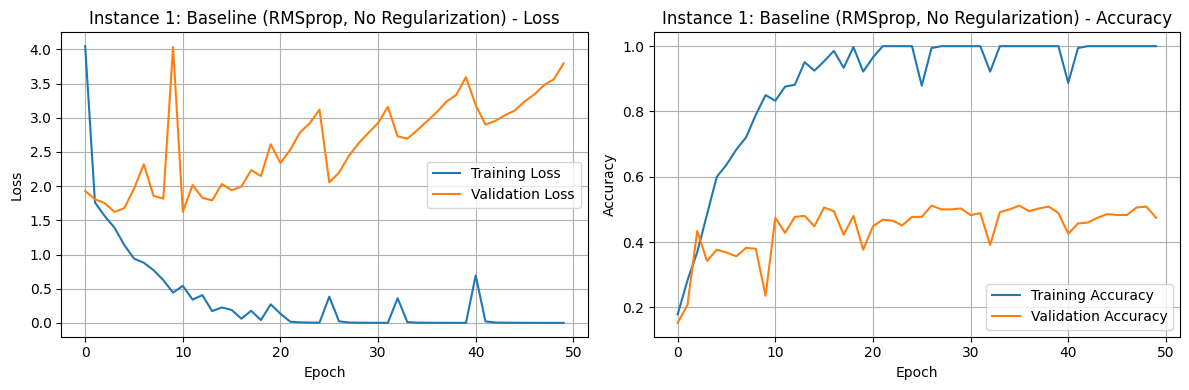


Final Training Loss: 0.0003
Final Validation Loss: 3.7942
Final Training Accuracy: 1.0000
Final Validation Accuracy: 0.4741


In [24]:
import matplotlib.pyplot as plt

def loss_curve_plot(model, history, title):
    """
    Plot training and validation loss curves for a trained model.
    
    Args:
        model: The trained Keras model
        history: The training history object returned by model.fit()
        title: Title for the plot
    """
    plt.figure(figsize=(12, 4))
    
    # Plot 1: Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Plot 2: Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print final metrics
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    
    print(f"\nFinal Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")
    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Instance 1: Baseline (no optimization techniques)
print("=== Training Instance 1: Baseline Model ===")
model1, cb1 = define_model(optimizer_name='rmsprop', regularization=None, early_stopping=False, dropout=0.0, learning_rate=0.001)
history1 = model1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[cb1] if cb1 else [],
    batch_size=32,
    verbose=1
)

# Plot loss curve for Instance 1
loss_curve_plot(model1, history1, "Instance 1: Baseline (RMSprop, No Regularization)")


=== Training Instance 2: Adam + L2 + Dropout ===
Epoch 1/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 540ms/step - accuracy: 0.1811 - loss: 4.0185 - val_accuracy: 0.1839 - val_loss: 2.9771
Epoch 2/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 465ms/step - accuracy: 0.2122 - loss: 2.8821 - val_accuracy: 0.1839 - val_loss: 2.7130
Epoch 3/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 450ms/step - accuracy: 0.2852 - loss: 2.4987 - val_accuracy: 0.2874 - val_loss: 2.3963
Epoch 4/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 456ms/step - accuracy: 0.3667 - loss: 2.0724 - val_accuracy: 0.3218 - val_loss: 2.1895
Epoch 5/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 459ms/step - accuracy: 0.5543 - loss: 1.6665 - val_accuracy: 0.4138 - val_loss: 2.1063
Epoch 6/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 509ms/step - accuracy: 0.6526 - loss: 1.4755 - val_accuracy: 0.3678 - val_loss: 2.1937
Epoch 7/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 462ms/step - accuracy: 0.6923 - loss: 1.3981 - val_accuracy: 0.4828 - val_loss: 2.0367
Epoch 8/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 583ms/step 

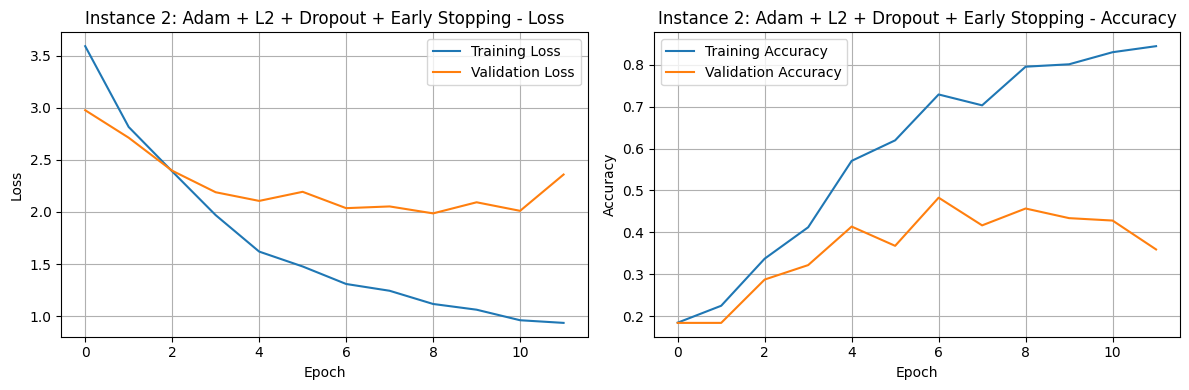


Final Training Loss: 0.9351
Final Validation Loss: 2.3596
Final Training Accuracy: 0.8444
Final Validation Accuracy: 0.3592


In [25]:
# Instance 2: Adam with L2 regularization and dropout
print("\n=== Training Instance 2: Adam + L2 + Dropout ===")
model2, cb2 = define_model(optimizer_name='adam', regularization='l2', early_stopping=True, dropout=0.2, learning_rate=0.001)
history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    callbacks=[cb2] if cb2 else [],
    batch_size=32,
    verbose=1
)

# Plot loss curve for Instance 2
loss_curve_plot(model2, history2, "Instance 2: Adam + L2 + Dropout + Early Stopping")


=== Training Instance 3: RMSprop + L1 ===
Epoch 1/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 586ms/step - accuracy: 0.1296 - loss: 98.5772 - val_accuracy: 0.1437 - val_loss: 30.3851
Epoch 2/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 537ms/step - accuracy: 0.1380 - loss: 28.1029 - val_accuracy: 0.1437 - val_loss: 24.0095
Epoch 3/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 705ms/step - accuracy: 0.1201 - loss: 24.2892 - val_accuracy: 0.1437 - val_loss: 24.0256
Epoch 4/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 946ms/step - accuracy: 0.1056 - loss: 22.9156 - val_accuracy: 0.2126 - val_loss: 20.9786
Epoch 5/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 617ms/step - accuracy: 0.1722 - loss: 21.5639 - val_accuracy: 0.1379 - val_loss: 22.1091
Epoch 6/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 551ms/step - accuracy: 0.1683 - loss: 21.1886 - val_accuracy: 0.1379 - val_loss: 19.7599
Epoch 7/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.1338 - loss: 20.4670 - val_accuracy: 0.1379 - val_loss: 21.3125
Epoch 8/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 628ms/

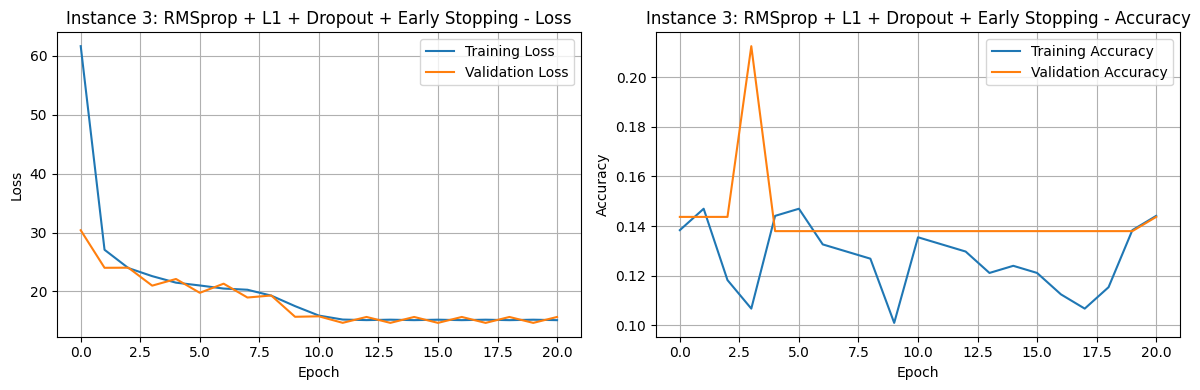


Final Training Loss: 15.1187
Final Validation Loss: 15.6601
Final Training Accuracy: 0.1441
Final Validation Accuracy: 0.1437


In [26]:
# Instance 3: RMSprop with L1 regularization
print("\n=== Training Instance 3: RMSprop + L1 ===")
model3, cb3 = define_model(optimizer_name='rmsprop', regularization='l1', early_stopping=True, dropout=0.4, learning_rate=0.001)
history3 = model3.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    callbacks=[cb3] if cb3 else [],
    batch_size=32,
    verbose=1
)

# Plot loss curve for Instance 3
loss_curve_plot(model3, history3, "Instance 3: RMSprop + L1 + Dropout + Early Stopping")


=== Training Instance 4: SGD (No Regularization) ===
Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 453ms/step - accuracy: 0.1085 - loss: 1.9638 - val_accuracy: 0.1897 - val_loss: 1.9368
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 407ms/step - accuracy: 0.1438 - loss: 1.9486 - val_accuracy: 0.2011 - val_loss: 1.9276
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 402ms/step - accuracy: 0.1834 - loss: 1.9348 - val_accuracy: 0.1954 - val_loss: 1.9222
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 619ms/step - accuracy: 0.2586 - loss: 1.9106 - val_accuracy: 0.2213 - val_loss: 1.9169
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 604ms/step - accuracy: 0.2243 - loss: 1.9009 - val_accuracy: 0.2557 - val_loss: 1.9106
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 538ms/step - accuracy: 0.2879 - loss: 1.8918 - val_accuracy: 0.2759 - val_loss: 1.9049
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 549ms/step - accuracy: 0.2852 - loss: 1.8834 - val_accuracy: 0.2356 - val_loss: 1.8994
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 

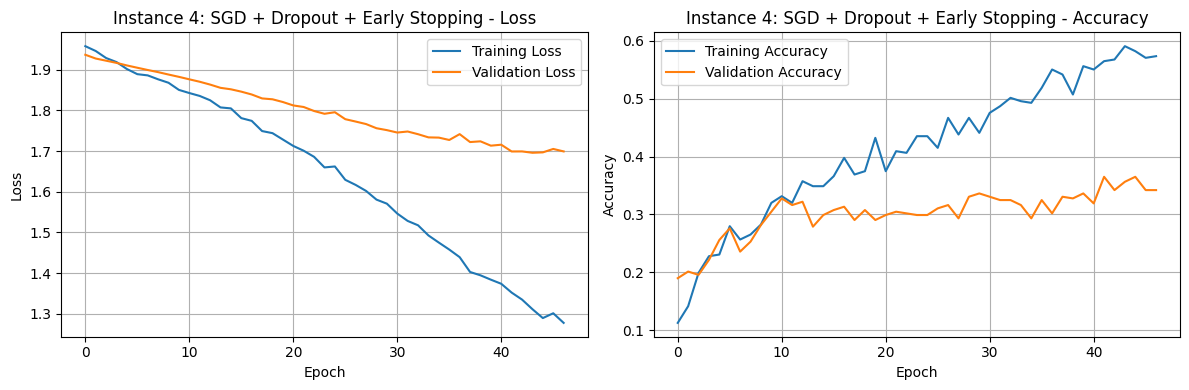


Final Training Loss: 1.2777
Final Validation Loss: 1.6992
Final Training Accuracy: 0.5735
Final Validation Accuracy: 0.3420


In [29]:
# Instance 4: SGD with no regularization
print("\n=== Training Instance 4: SGD (No Regularization) ===")
model4, cb4 = define_model(optimizer_name='sgd', regularization=None, early_stopping=True, dropout=0.3, learning_rate=0.001)
history4 = model4.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    callbacks=[cb4] if cb4 else [],
    batch_size=32,
    verbose=1
)

# Plot loss curve for Instance 4
loss_curve_plot(model4, history4, "Instance 4: SGD + Dropout + Early Stopping")


=== Training Instance 5: Optimized Adam ===
Epoch 1/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 534ms/step - accuracy: 0.1430 - loss: 3.6606 - val_accuracy: 0.1753 - val_loss: 3.4566
Epoch 2/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 490ms/step - accuracy: 0.3238 - loss: 3.3313 - val_accuracy: 0.2241 - val_loss: 3.1859
Epoch 3/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 833ms/step - accuracy: 0.3532 - loss: 3.0093 - val_accuracy: 0.3937 - val_loss: 2.9748
Epoch 4/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 631ms/step - accuracy: 0.5380 - loss: 2.6873 - val_accuracy: 0.3736 - val_loss: 2.8190
Epoch 5/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 678ms/step - accuracy: 0.4964 - loss: 2.4476 - val_accuracy: 0.3994 - val_loss: 2.7010
Epoch 6/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 622ms/step - accuracy: 0.5750 - loss: 2.2458 - val_accuracy: 0.3822 - val_loss: 2.6031
Epoch 7/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 550ms/step - accuracy: 0.6307 - loss: 2.0580 - val_accuracy: 0.3592 - val_loss: 2.5473
Epoch 8/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 761ms/step - accu

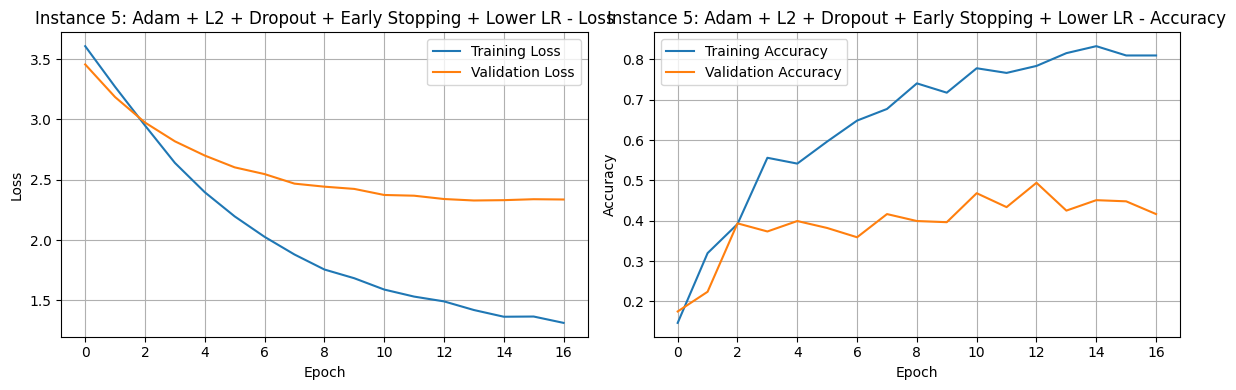


Final Training Loss: 1.3136
Final Validation Loss: 2.3366
Final Training Accuracy: 0.8098
Final Validation Accuracy: 0.4167


In [30]:
# Instance 5: Best combination (Adam with lower learning rate)
print("\n=== Training Instance 5: Optimized Adam ===")
model5, cb5 = define_model(optimizer_name='adam', regularization='l2', early_stopping=True, dropout=0.5, learning_rate=0.0001)
history5 = model5.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    callbacks=[cb5] if cb5 else [],
    batch_size=32,
    verbose=1
)

# Plot loss curve for Instance 5
loss_curve_plot(model5, history5, "Instance 5: Adam + L2 + Dropout + Early Stopping + Lower LR")

In [31]:
# Save all models
model1.save('saved_models/model1_baseline.keras')
model2.save('saved_models/model2_adam_l2.keras')
model3.save('saved_models/model3_rmsprop_l1.keras')
model4.save('saved_models/model4_sgd.keras')
model5.save('saved_models/model5_optimized_adam.keras')

print("\nAll models saved to saved_models/ directory")


All models saved to saved_models/ directory


In [32]:
# --- Evaluate All Models and Calculate Metrics ---

def evaluate_model(model, history, X_val, y_val, instance_name):
    """Evaluate a model and return metrics"""
    # Get predictions
    y_pred_proba = model.predict(X_val)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_val, axis=1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    
    # Get final loss and accuracy from history
    final_val_loss = history.history['val_loss'][-1]
    final_val_accuracy = history.history['val_accuracy'][-1]
    
    print(f"\n--- {instance_name} Results ---")
    print(f"Validation Accuracy: {final_val_accuracy:.4f}")
    print(f"Validation Loss: {final_val_loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    return {
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'val_loss': final_val_loss,
        'val_accuracy': final_val_accuracy
    }

# Evaluate all models
models = [model1, model2, model3, model4, model5]
histories = [history1, history2, history3, history4, history5]
names = ["Instance 1: Baseline", "Instance 2: Adam+L2", "Instance 3: RMSprop+L1", 
         "Instance 4: SGD", "Instance 5: Optimized Adam"]

results = []
for model, history, name in zip(models, histories, names):
    result = evaluate_model(model, history, X_val, y_val, name)
    results.append(result)

# Print summary table
print("\n" + "="*80)
print("SUMMARY TABLE OF ALL TRAINING INSTANCES")
print("="*80)
print(f"{'Instance':<25} {'Optimizer':<10} {'Regularizer':<12} {'Dropout':<8} {'LR':<8} {'Val Acc':<8} {'Val Loss':<8} {'F1':<8}")
print("-"*80)

for i, (name, result) in enumerate(zip(names, results)):
    # Extract parameters from the name or you can store them separately
    print(f"{name:<25} {'See above':<10} {'See above':<12} {'See above':<8} {'See above':<8} {result['val_accuracy']:<8.4f} {result['val_loss']:<8.4f} {result['f1_score']:<8.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step

--- Instance 1: Baseline Results ---
Validation Accuracy: 0.4741
Validation Loss: 3.7942
Test Accuracy: 0.4741
F1 Score: 0.4752
Precision: 0.4835
Recall: 0.4741
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step

--- Instance 2: Adam+L2 Results ---
Validation Accuracy: 0.3592
Validation Loss: 2.3596
Test Accuracy: 0.4569
F1 Score: 0.4570
Precision: 0.4694
Recall: 0.4569
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


c:\Users\ELOHOME\AgroInsightX_ML\AgroInsightX_ML_Project\.venv_maize\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])



--- Instance 3: RMSprop+L1 Results ---
Validation Accuracy: 0.1437
Validation Loss: 15.6601
Test Accuracy: 0.1379
F1 Score: 0.0334
Precision: 0.0190
Recall: 0.1379
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step

--- Instance 4: SGD Results ---
Validation Accuracy: 0.3420
Validation Loss: 1.6992
Test Accuracy: 0.3563
F1 Score: 0.3244
Precision: 0.3419
Recall: 0.3563
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step

--- Instance 5: Optimized Adam Results ---
Validation Accuracy: 0.4167
Validation Loss: 2.3366
Test Accuracy: 0.4253
F1 Score: 0.4187
Precision: 0.4316
Recall: 0.4253

SUMMARY TABLE OF ALL TRAINING INSTANCES
Instance                  Optimizer  Regularizer  Dropout  LR       Val Acc  Val Loss F1      
--------------------------------------------------------------------------------
Instance 1: Baseline      See above  See above    See above See above 0.4741   3.7942   0.4752  
Instance 2: Adam+L2       See above  See above    See above See above 0.3592   2.3596   0.4570  
Instance 3: RMSpro

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from tensorflow.keras.models import load_model
import joblib

def make_predictions(model_path, X, model_type='neural_network'):
    """
    Make predictions using a saved model.
    
    Args:
        model_path: Path to the saved model
        X: Input data
        model_type: 'neural_network' or 'classical_ml'
    
    Returns:
        predictions: Predicted class labels
        probabilities: Prediction probabilities
    """
    if model_type == 'neural_network':
        # Load Keras model
        model = load_model(model_path)
        # Make predictions
        probabilities = model.predict(X)
        predictions = np.argmax(probabilities, axis=1)
    else:
        # Load classical ML model (SVM, Logistic Regression, etc.)
        model = joblib.load(model_path)
        # Make predictions
        probabilities = model.predict_proba(X)
        predictions = model.predict(X)
    
    return predictions, probabilities

def plot_confusion_matrix(y_true, y_pred, class_names, title):
    """
    Create and display a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return cm

def evaluate_model_performance(y_true, y_pred, probabilities, model_name):
    """
    Evaluate model performance and display metrics.
    """
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"\n{'='*60}")
    print(f"PERFORMANCE EVALUATION: {model_name}")
    print(f"{'='*60}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (Weighted): {f1:.4f}")
    
    # Classification report
    print(f"\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    return accuracy, f1

# Define class names (update these to match your dataset)
class_names = ['Fall_Armyworm', 'Grasshoper', 'Healthy_Maize', 'Leaf_Beetle', 'Leaf_Blight', 'Leaf_Spot', 'Streak_Virus']

# Load test data (you'll need to create this from your validation set or a separate test set)
# For now, using validation data as test data
X_test = X_val  # Replace with actual test data if available
y_test = np.argmax(y_val, axis=1)  # Convert one-hot to class indices

print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Number of classes: {len(class_names)}")

Test data shape: (348, 128, 128, 3)
Test labels shape: (348,)
Number of classes: 7


Loading best neural network model...
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step

PERFORMANCE EVALUATION: Best Neural Network Model
Accuracy: 0.4253
F1 Score (Weighted): 0.4187

Classification Report:
               precision    recall  f1-score   support

Fall_Armyworm       0.30      0.48      0.37        50
   Grasshoper       0.42      0.58      0.49        50
Healthy_Maize       0.54      0.44      0.48        48
  Leaf_Beetle       0.55      0.52      0.54        50
  Leaf_Blight       0.51      0.52      0.51        50
    Leaf_Spot       0.31      0.20      0.24        50
 Streak_Virus       0.39      0.24      0.30        50

     accuracy                           0.43       348
    macro avg       0.43      0.43      0.42       348
 weighted avg       0.43      0.43      0.42       348



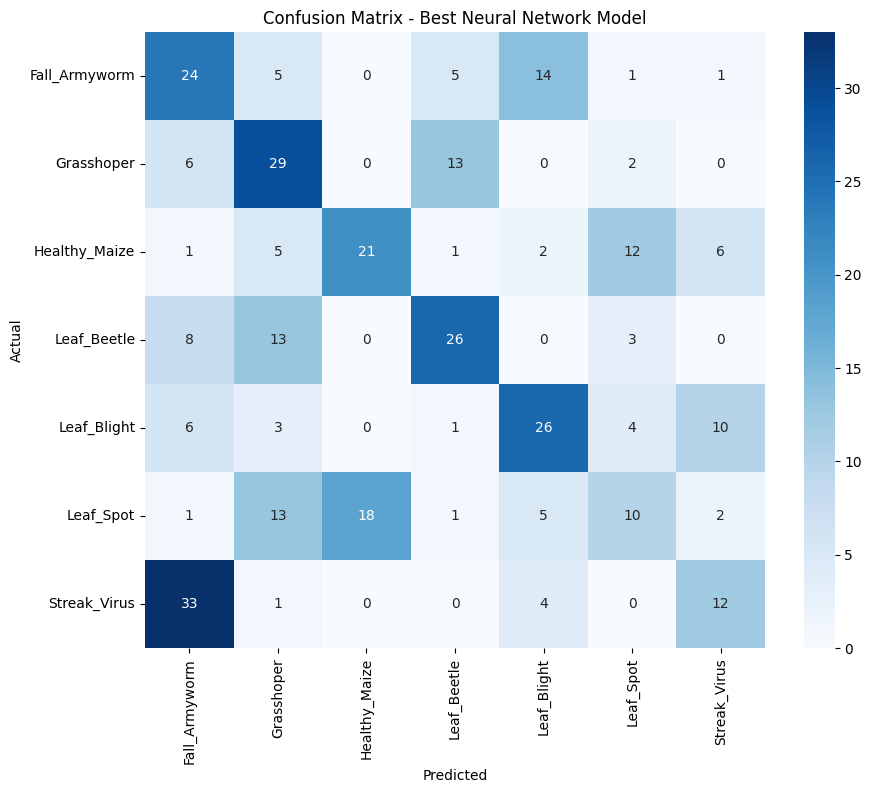

In [34]:
# Load and evaluate the best neural network model
best_nn_model_path = 'saved_models/model5_optimized_adam.keras'  
print("Loading best neural network model...")
nn_predictions, nn_probabilities = make_predictions(
    best_nn_model_path, 
    X_test, 
    model_type='neural_network'
)

# Evaluate neural network performance
nn_accuracy, nn_f1 = evaluate_model_performance(
    y_test, 
    nn_predictions, 
    nn_probabilities, 
    "Best Neural Network Model"
)

# Create confusion matrix for neural network
nn_cm = plot_confusion_matrix(
    y_test, 
    nn_predictions, 
    class_names, 
    "Best Neural Network Model"
)

Congratulations!!
